<a href="https://colab.research.google.com/github/chakatzib/CS430/blob/main/MLA5_JBG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
**Joey Guthrie**  

## Standard Imports

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [42]:
#example - you will replace this with the models you are actually using.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier


## Imports for Splitting Data and Building Pipeline


In [43]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [45]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [46]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [47]:
landsat_train=pd.read_csv('/content/gdrive/MyDrive/CS430/MLA5/landsat_train.csv')
landsat_test=pd.read_csv('/content/gdrive/MyDrive/CS430/MLA5/landsat_test.csv')

### Statistical and Visual Exploration

<Axes: xlabel='land_type', ylabel='count'>

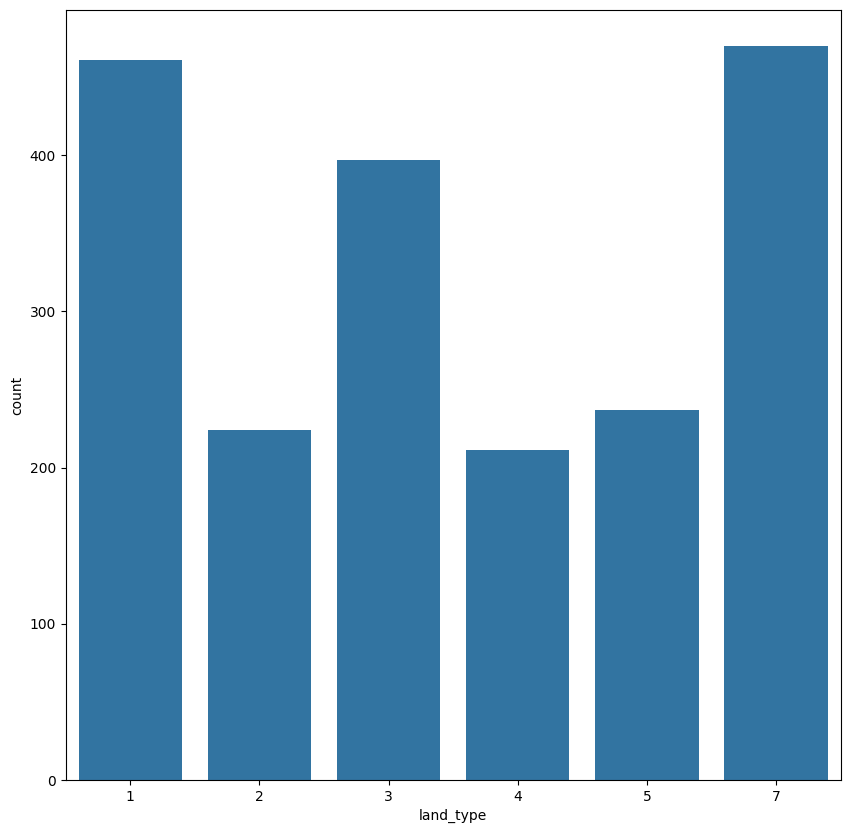

In [48]:
plt.figure(figsize=(10,10))
sns.barplot(landsat_test.land_type.value_counts())

<Axes: xlabel='land_type', ylabel='count'>

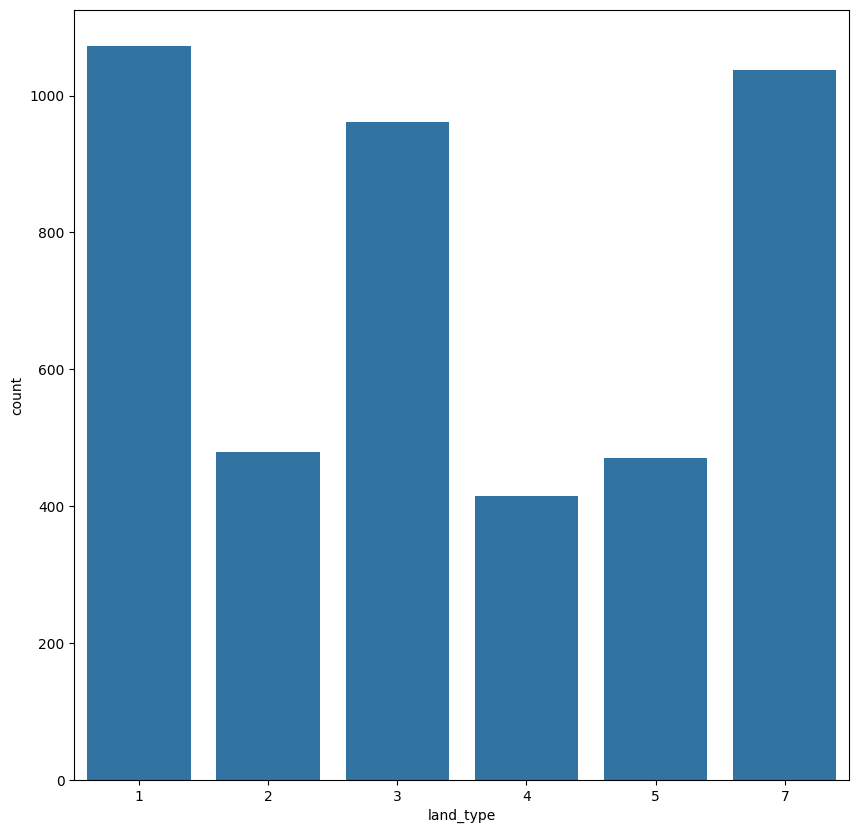

In [49]:
plt.figure(figsize=(10,10))
sns.barplot(landsat_train.land_type.value_counts())

### Splitting Data into Train/Test

In [50]:
X_train=landsat_train.drop('land_type', axis=1)
y_train=landsat_train['land_type']
X_test=landsat_test.drop('land_type', axis=1)
y_test=landsat_test['land_type']

### Building the Pipeline

In [51]:
columntransformer = ColumnTransformer([
    ('scaler', MinMaxScaler(), X_train.columns),
])


In [52]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('columntransformer', columntransformer),
    ('classifier', RandomForestClassifier())])
pipeline.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middle_left_infra1...
       'middle_right_r', 'middle_right_g', 'middle_right_infra1',
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier())])

### Executing the Model

### Evaluating Model

In [53]:
y_pred=pipeline.predict(X_test)

In [54]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           1       0.98      0.99      0.98       461\n           2       0.97      0.96      0.97       224\n           3       0.89      0.95      0.92       397\n           4       0.80      0.63      0.70       211\n           5       0.92      0.90      0.91       237\n           7       0.87      0.91      0.89       470\n\n    accuracy                           0.91      2000\n   macro avg       0.90      0.89      0.90      2000\nweighted avg       0.91      0.91      0.91      2000\n'

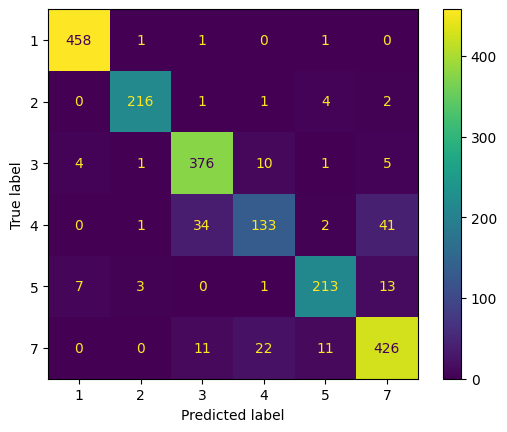

In [55]:
confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test)

### Conclusion
Write a general conclusion about the results of your model.

I think the model performed decently, though I am frustrated with the low accuracy with regards to label 4 on the heatmap. It didn't perform subpar to what I expected, but I certainly would've wanted more accuracy. It isn't bad at predicting landtype, but I suspect that there are better ways to predict landtype than randomforest.



## Problem 2

### Reading the Data

### Splitting Data into Train/Test

In [56]:
X_train2=landsat_train.drop('land_type', axis=1)
y_train2=landsat_train['land_type']
X_test2=landsat_test.drop('land_type', axis=1)
y_test2=landsat_test['land_type']

### Building the Pipeline

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           1       0.94      0.76      0.84       461
           2       0.60      0.96      0.74       224
           3       0.77      0.67      0.72       397
           4       0.43      0.77      0.55       211
           5       0.42      0.20      0.27       237
           7       0.79      0.74      0.76       470

    accuracy                           0.69      2000
   macro avg       0.66      0.68      0.65      2000
weighted avg       0.72      0.69      0.69      2000



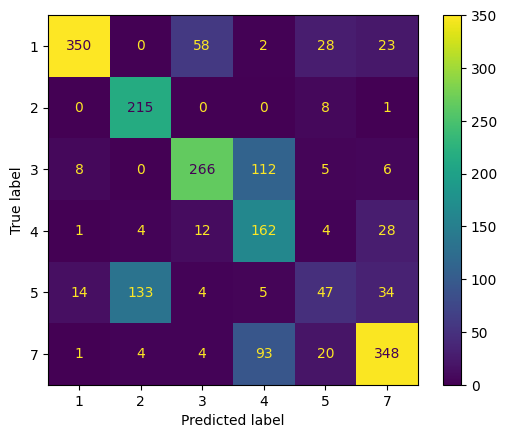

In [57]:



boosting_classifier = AdaBoostClassifier()
pipeline = Pipeline([
    ('columntransformer', columntransformer),
    ('classifier', boosting_classifier)])

pipeline.fit(X_train2, y_train2)


y_pred2 = pipeline.predict(X_test2)


from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report(y_test2, y_pred2))
ConfusionMatrixDisplay.from_estimator(pipeline, X_test2, y_test2)


### Executing the Model

### Evaluating Model

### Conclusion
Write a general conclusion about the results of your model.

Ironically, the adaboost thing made the results worse and less accurate than before. I am not pleased with these results.


Problem 3


In [58]:
banknoteauth=pd.read_csv('/content/gdrive/MyDrive/CS430/MLA5/banknote_authentication (1).csv')

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [67]:
banknoteauth.describe()


,variance,skewness,curtosis,entropy,forgery
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [61]:
banknotetest=banknoteauth.sample(frac=0.2)
banknotetrain=banknoteauth.drop(banknotetest.index)

<Axes: xlabel='None', ylabel='None'>

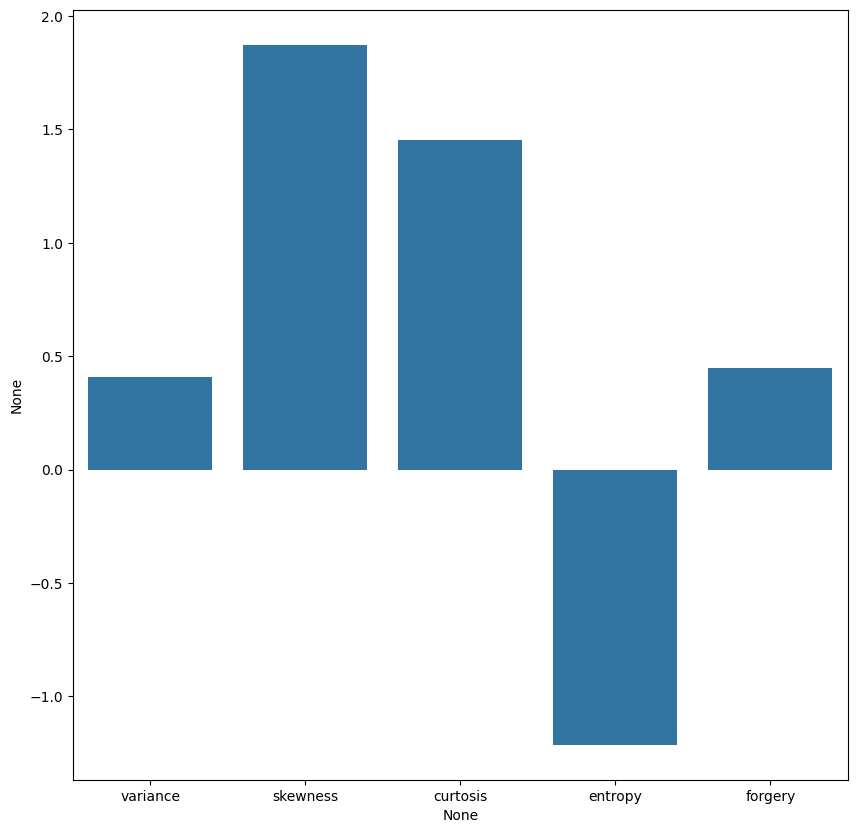

In [62]:
plt.figure(figsize=(10,10))
sns.barplot(x=banknotetrain.columns,y=banknotetrain.mean())

<Axes: xlabel='None', ylabel='None'>

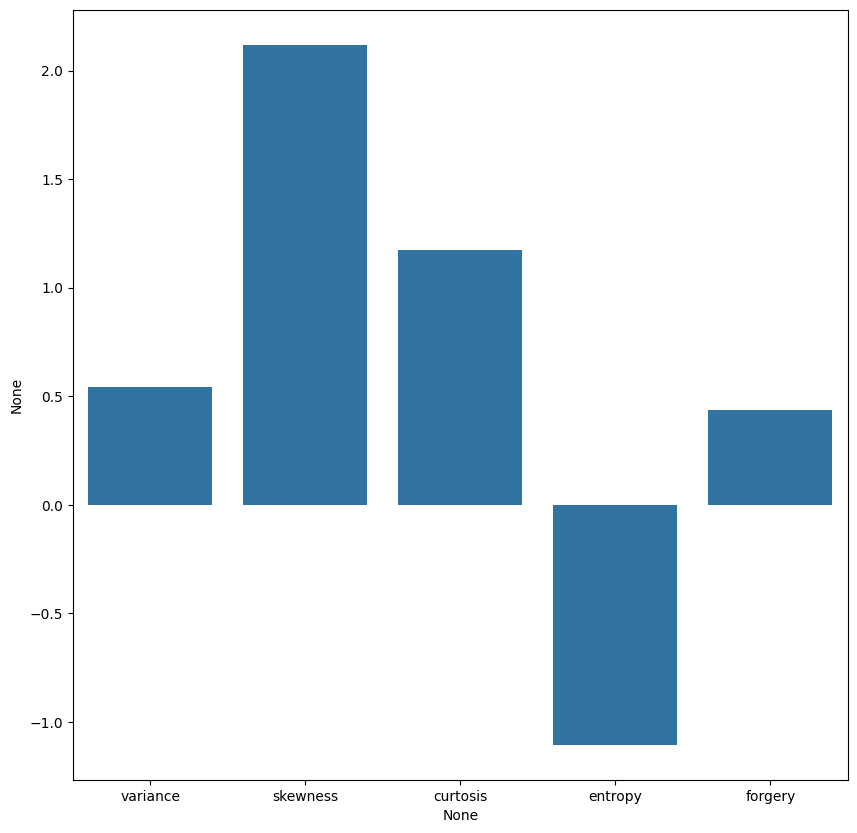

In [63]:
plt.figure(figsize=(10,10))
sns.barplot(x=banknotetest.columns,y=banknotetest.mean())

In [68]:
banknotetrain.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'forgery'], dtype='object')

In [69]:
X_train3=banknotetrain.drop('forgery',axis=1)
y_train3=banknotetrain['forgery']
X_test3=banknotetest.drop('forgery', axis=1)
y_test3=banknotetest['forgery']

In [70]:
columntransformer = ColumnTransformer([
    ('scaler', MinMaxScaler(), X_train3.columns),
])

In [71]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('columntransformer', columntransformer),
    ('classifier', RandomForestClassifier())])
pipeline.fit(X_train3, y_train3)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object'))])),
                ('classifier', RandomForestClassifier())])

In [72]:
y_pred3=pipeline.predict(X_test3)

In [73]:
classification_report(y_test3, y_pred3)

'              precision    recall  f1-score   support\n\n           0       1.00      0.98      0.99       155\n           1       0.98      1.00      0.99       119\n\n    accuracy                           0.99       274\n   macro avg       0.99      0.99      0.99       274\nweighted avg       0.99      0.99      0.99       274\n'

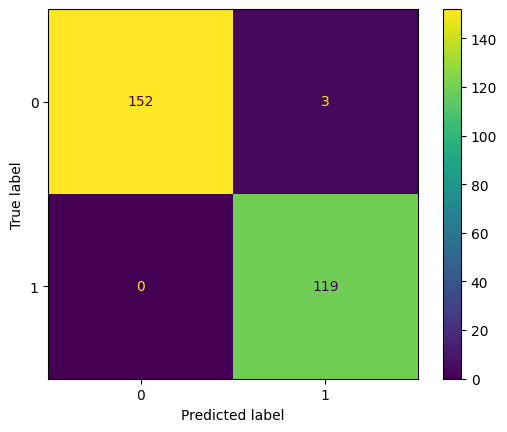

In [74]:
confusion_matrix(y_test3, y_pred3)
ConfusionMatrixDisplay.from_estimator(pipeline, X_test3, y_test3)

**results**


This randomforestclassifier model worked VERY well for the banknote data. As far as I can tell, this is INCREDIBLY close to being 100% accurate in its predictions. Overall, I think randomforest might be my favorite classifier to use, with its ease of use and accuracy.
